## Challenge

Do a little scraping or API-calling of your own.  Pick a new website and see what you can get out of it.  Expect that you'll run into bugs and blind alleys, and rely on your mentor to help you get through.  

Formally, your goal is to write a scraper that will:

1) Return specific pieces of information (rather than just downloading a whole page)  
2) Iterate over multiple pages/queries  
3) Save the data to your computer  

Once you have your data, compute some statistical summaries and/or visualizations that give you some new insights into your scraping topic of interest.  Write up a report from scraping code to summary and share it with your mentor.

In [1]:
import scrapy
from scrapy.crawler import CrawlerProcess


class CraigslistSpider(scrapy.Spider):
    name = "CS"
    
    # Here is where we insert our API call.
    start_urls = [
        'https://newyork.craigslist.org/search/aap'
        ]

    # Use XPath to parse the response we get.
    def parse(self, response):
        
        # Iterate over every <article> element on the page.
        for posting in response.xpath('//p'):
            
            # Yield a dictionary with the values we want.
            yield {
                # This is the code to choose what we want to extract
                # You can modify this with other Xpath expressions to extract other information from the site
                'title': posting.xpath('a[@class="result-title hdrlnk"]/text()').extract_first(),
                'date': posting.xpath('time[@class="result-date"]/text()').extract_first(),
                'price': posting.xpath('span/span[@class="result-price"]/text()').extract_first()
            }
        
        # scrape all pages
        next_page_relative_url = response.xpath('//a[@class="button next"]/@href').extract_first()
        next_page_absolute_url = response.urljoin(next_page_relative_url)
    
process = CrawlerProcess({
    'FEED_FORMAT': 'json',
    'FEED_URI': 'apartments.json',
    # Note that because we are doing API queries, the robots.txt file doesn't apply to us.
    'USER_AGENT': 'ThinkfulDataScienceBootcampCrawler (thinkful.com)',
    'LOG_ENABLED': False,
    # We use CLOSESPIDER_PAGECOUNT to limit our scraper to the first 100 links.    
    'CLOSESPIDER_PAGECOUNT' : 10
})
                                         

# Starting the crawler with our spider.
process.crawl(CraigslistSpider)
process.start()
print('Links extracted!')


Links extracted!


In [2]:
type('apartments.json')

str

In [3]:
import pandas as pd

# Turning JSON into Data Frame
apartments = pd.read_json('apartments.json', orient='records')
print(apartments.shape)
apartments.head()

(120, 3)


,date,price,title
0,Feb 2,$2800,this newly~-~ renovated 4 bed features hardwoo...
1,Feb 2,$3350,"Duplex apartment, 3 bedrooms ❣❣ upstairs and t..."
2,Feb 2,$2395,ALL NEW STUDIO WITH BALCONY FACING SOUTH GREAT...
3,Feb 2,$2062,►►►►►►►► BEST DEAL OF THE YEAR
4,Feb 2,$1200,"$1,200 per month Room for Rent"


In [6]:
apartments.head(10)

,date,price,title
0,Feb 2,$2800,this newly~-~ renovated 4 bed features hardwoo...
1,Feb 2,$3350,"Duplex apartment, 3 bedrooms ❣❣ upstairs and t..."
2,Feb 2,$2395,ALL NEW STUDIO WITH BALCONY FACING SOUTH GREAT...
3,Feb 2,$2062,►►►►►►►► BEST DEAL OF THE YEAR
4,Feb 2,$1200,"$1,200 per month Room for Rent"
5,Feb 2,$2200,Elevator bldg ------ all amenities + Feb March...
6,Feb 2,$800,"Black Rock,Bridgeport"
7,Feb 2,$6500,NO BROKER FEE LUX DOORMAN BLDG HEALTH CLUB AND...
8,Feb 2,$2600,GORGEOUS LUXURY BUILDING WITH AMENITIES*GYM*RO...
9,Feb 2,$2795,SKYLIGHTS+HIGH CEILINGS! GREAT FOR SHARES*GYM*...


In [9]:
import re
apartments.price = apartments.price.map(lambda x: None if x == None else int(re.sub('\$', '', str(x))))

Quick data cleaning since it included dollar signs in the price data that we'll use.

In [10]:
print('Average Rent in NYC:', apartments.price.mean())

Average Rent in NYC: 2538.186440677966


Yikes! NYC isn't cheap my friends.

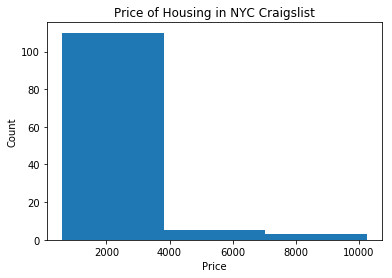

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(apartments.price, bins=3)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price of Housing in NYC Craigslist')
plt.show()

While some of the outliers certainly bring the average up, it seems somewhere around $2,000 is the going rate for an apartment in NYC.